In [12]:
from __future__ import division, print_function
import os
import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd

In [31]:
# setting up some preferences
%pylab inline

np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10, 6))
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info', 'rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

def get_jsonparsed_data(url):
    """
    from http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
    Receive the content of ``url``, parse it as JSON and return the object.
    Parameters
    ----------
    url : str
    Returns
    -------
    dict
    """
    response = urllib.urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [3]:
db = get_jsonparsed_data('https://raw.githubusercontent.com/pydata/pydata-book/master/ch07/foods-2011-10-03.json')
len(db)

6636

In [4]:
db[0]

{u'description': u'Cheese, caraway',
 u'group': u'Dairy and Egg Products',
 u'id': 1008,
 u'manufacturer': u'',
 u'nutrients': [{u'description': u'Protein',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 25.18},
  {u'description': u'Total lipid (fat)',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 29.2},
  {u'description': u'Carbohydrate, by difference',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 3.06},
  {u'description': u'Ash', u'group': u'Other', u'units': u'g', u'value': 3.28},
  {u'description': u'Energy',
   u'group': u'Energy',
   u'units': u'kcal',
   u'value': 376.0},
  {u'description': u'Water',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 39.28},
  {u'description': u'Energy',
   u'group': u'Energy',
   u'units': u'kJ',
   u'value': 1573.0},
  {u'description': u'Fiber, total dietary',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 0.0},
  {u'description': u'Calcium, Ca',
   u'group': u'Elements',
   

In [5]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [8]:
db[0]['nutrients'][1]

{u'description': u'Total lipid (fat)',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 29.2}

In [13]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [14]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [15]:
info = DataFrame(db, columns=info_keys)

In [16]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [17]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [18]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [19]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)   

In [20]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [21]:
nutrients.duplicated().sum()

14179

In [22]:
nutrients = nutrients.drop_duplicates()  

In [23]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [24]:
col_mapping = {'description' : 'food',
               'group' : 'fgroup'}

In [25]:
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [26]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}

In [27]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [28]:
ndata = pd.merge(nutrients, info, on='id', how='outer')   
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [29]:
ndata.ix[30000]  

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


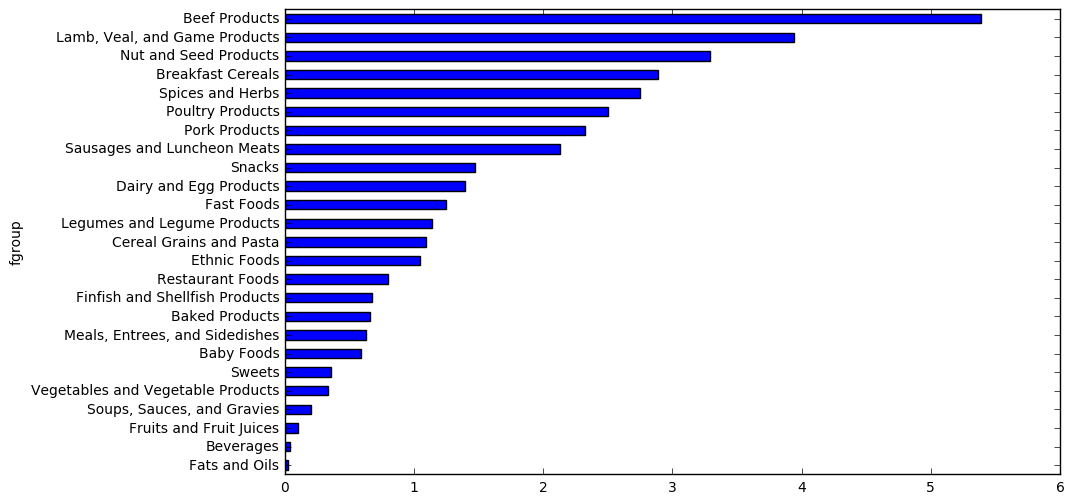

In [32]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].order().plot(kind='barh')  

In [33]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())   
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make it smaller
max_foods.food = max_foods.food.str[:50]  

In [34]:
max_foods.ix['Amino Acids']['food']  

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [35]:
by_nutrient

In [36]:
max_foods

value  \
nutgroup    nutrient                                         
Amino Acids Alanine                                  8.009   
            Arginine                                 7.436   
            Aspartic acid                           10.203   
            Cystine                                  1.307   
            Glutamic acid                           17.452   
            Glycine                                 19.049   
            Histidine                                2.999   
            Hydroxyproline                           0.803   
            Isoleucine                               4.300   
            Leucine                                  7.200   
            Lysine                                   6.690   
            Methionine                               1.859   
            Phenylalanine                            4.600   
            Proline                                 12.295   
            Serine                                   4.600   
            Threonine                                3.300   
            Tryptophan                               1.600   
            Tyrosine                                 3.300   
            Valine                                   4.500   
Composition Adjusted Protein                        12.900   
            Carbohydrate, by difference            100.000   
            Fiber, total dietary                    79.000   
            Protein                                 88.320   
            Sugars, total                           99.800   
            Total lipid (fat)                      100.000   
            Water                                  100.000   
Elements    Calcium, Ca                           7364.000   
            Copper, Cu                              15.050   
            Fluoride, F                            584.000   
            Iron, Fe                                87.470   
            Magnesium, Mg                          781.000   
            Manganese, Mn                          133.000   
            Phosphorus, P                         9918.000   
            Potassium, K                         16500.000   
            Selenium, Se                          1917.000   
            Sodium, Na                           27360.000   
            Zinc, Zn                                90.950   
Energy      Energy                                3774.000   
Other       Alcohol, ethyl                          42.500   
            Ash                                     72.500   
            Beta-sitosterol                        426.000   
            Caffeine                              3680.000   
            Campesterol                            241.000   
            Cholesterol                           3100.000   
            Fatty acids, total monounsaturated      83.689   
            Fatty acids, total polyunsaturated      66.000   
            Fatty acids, total saturated            95.600   
            Fatty acids, total trans                20.578   
            Fatty acids, total trans-monoenoic      18.970   
            Fatty acids, total trans-polyenoic       3.543   
            Phytosterols                          9060.000   
            Stigmasterol                            38.000   
            Theobromine                           2634.000   
Sugars      Fructose                                42.830   
            Galactose                                5.620   
            Glucose (dextrose)                      57.000   
            Lactose                                 56.000   
            Maltose                                 10.430   
            Starch                                  73.770   
            Sucrose                                 99.800   
Vitamins    Betaine                                630.400   
            Carotene, alpha                      14251.000   
            Carotene, beta                       42891.000   
            Choline, to